# Лабораторная работа №4
## Выполнил студент группы БПИ2301

### Задание №1
Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом.

In [276]:
import heapq

def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph} # distances = {0: inf, 1: inf, 2: inf}
    distances[start] = 0 
    visited = set()
    queue = [(0, start)] # (расстояние от начальной вершины до этой, вершина)

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_node in visited:
            continue
        visited.add(current_node)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))

    return distances

graph = {
            0: {1: 4, 2: 10}, # из веришны 0 дуга длиной 4 в вершину 1, из веришны 0 дуга длиной 10 в вершину 2
            1: {2: 5},        # из веришны 1 дуга длиной 5 в вершину 2
            2: {},
        }

start = 0 # имя начальной вершины

dijkstra(graph, start)

{0: 0, 1: 4, 2: 9}

### Задание №2
Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса.


In [277]:
import networkx as nx

def read_matrix_from_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    matrix = []
    for line in lines:
        row = list(map(int, line.strip().split()))
        matrix.append(row)
    return matrix

def matrix_to_dict(matrix):
    graph = {}
    size = len(matrix)
    for i in range(size):
        graph[i] = {}  
        for j in range(size):
            weight = matrix[i][j]
            if weight != 0:
                graph[i][j] = weight            
    return graph

In [278]:
matrix = read_matrix_from_file("matrix.txt")
print("adjacency matrix:")
print(*matrix, sep="\n")

graph_from_matrix = matrix_to_dict(matrix)
print("\ndict:")
print(graph_from_matrix)

adjacency matrix:
[0, 4, 10]
[0, 0, 5]
[0, 0, 0]

dict:
{0: {1: 4, 2: 10}, 1: {2: 5}, 2: {}}


### Задание №3
Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

In [279]:
def get_shortest_path(graph, start, end):
    distances = dijkstra(graph, start)
    if distances[end] == float('inf'):
        return None, float('inf')

    path = []
    current = end

    while current != start:
        for prev in graph:
            if current in graph[prev]:
                if distances[prev] + graph[prev][current] == distances[current]:
                    path.append(current)
                    current = prev
                    break
        else:
            return None, float('inf')
    path.append(start)
    path.reverse()
    return path, distances[end]

end = 2 # имя конечной вершины
get_shortest_path(graph, start, end)

([0, 1, 2], 9)

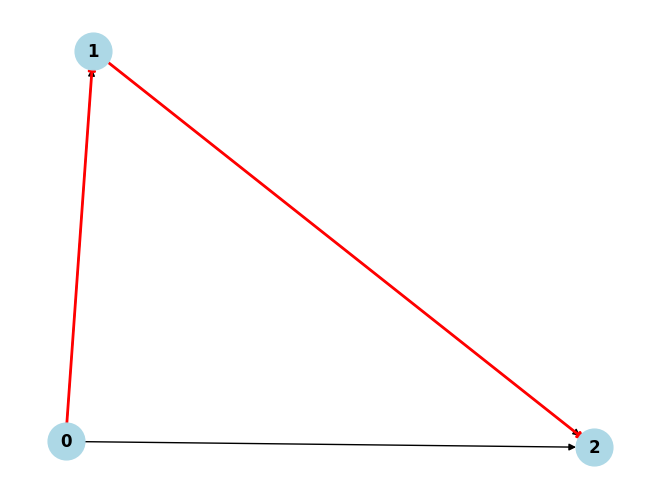

In [280]:
from ipywidgets import interact, widgets

def draw_graph(G, path=None):
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

G = nx.DiGraph(graph)
draw_graph(G,  [0, 1, 2])

In [281]:
def interactive_shortest_path(graph, matrix=False):
    if matrix:
        graph = matrix_to_dict(graph)
    G = nx.DiGraph(graph)
    nodes = list(G.nodes)

    @interact(start=widgets.Dropdown(options=nodes, description="Start:"),
              end=widgets.Dropdown(options=nodes, description="End:"))
    def find_path(start, end):
        path, distance = get_shortest_path(graph, start, end)
        if path is None:
            print(f"There is no path from {start} to {end}")
            draw_graph(G)
        else:
            print(f"Shortest path from {start} to {end}: {path}")
            print(f"Path length: {distance}")
            draw_graph(G, path=path)

In [282]:
graph_example = {
    0: {1: 4, 2: 10},
    1: {2: 5},
    2: {},
}

interactive_shortest_path(graph_example)

interactive(children=(Dropdown(description='Start:', options=(0, 1, 2), value=0), Dropdown(description='End:',…

In [283]:
matrix_example = read_matrix_from_file("matrix.txt")

interactive_shortest_path(matrix_example, True)

interactive(children=(Dropdown(description='Start:', options=(0, 1, 2), value=0), Dropdown(description='End:',…

### Задание №4
По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.

In [284]:
import random
import time
import pandas as pd

def generate_random_adj_matrix(size, edge_prob, max_weight=100):
    # edge_prob - вероятность наличия ребра между двумя вершинами
    matrix = [[0]*size for _ in range(size)]
    for i in range(size):
        for j in range(size):
            if i != j and random.random() < edge_prob:
                matrix[i][j] = random.randint(1, max_weight)
    return matrix

results = []
node_counts = [100, 300, 500, 700, 900]
edge_probs = [0.2, 0.5, 0.8]

for n in node_counts:
    for p in edge_probs:
        matrix = generate_random_adj_matrix(n, edge_prob=p)
        graph = matrix_to_dict(matrix)

        start_time = time.time()
        dijkstra(graph, 0) # O((V + E) * log V) для heapq
        exec_time = time.time() - start_time

        num_edges = sum(len(v) for v in graph.values())
        results.append({
            "Vertices": n,
            "Density": p,
            "Edges": num_edges,
            "Execution Time (s)": round(exec_time, 4)
        })

df = pd.DataFrame(results)
df.sort_values(by=["Vertices", "Density"])


,Vertices,Density,Edges,Execution Time (s)
0,100,0.2,1918,0.0003
1,100,0.5,4956,0.0003
2,100,0.8,7959,0.0005
3,300,0.2,17954,0.0011
4,300,0.5,45009,0.0023
5,300,0.8,71720,0.0033
6,500,0.2,50124,0.0031
7,500,0.5,124775,0.0066
8,500,0.8,199629,0.0086
9,700,0.2,97644,0.0085
